<AxesSubplot:>

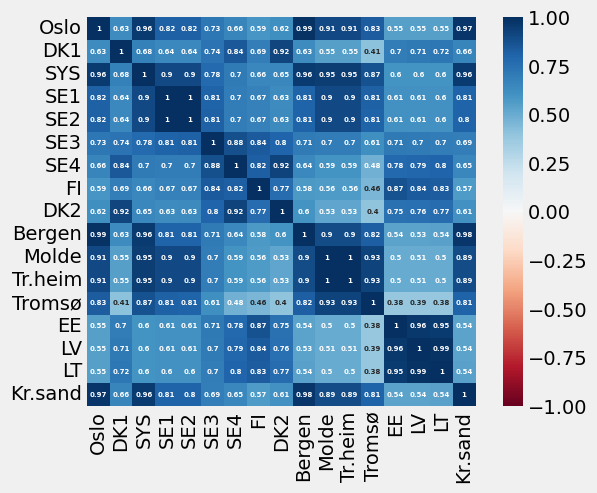

In [23]:
# a part of this code is based on a youtube tutorial on XGBoost from "Medallion Data Science" channel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

df = pd.read_excel(r'data/2017-2021.xlsx')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size = 0.3, random_state = 123)

corr = df.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':5, 'fontweight':'bold'},
           square=True)

In [24]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['month'] = df.index.month
    return df

df = create_features(df)

df

,Oslo,DK1,SYS,SE1,SE2,SE3,SE4,FI,DK2,Bergen,Molde,Tr.heim,Tromsø,EE,LV,LT,Kr.sand,month
Datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,257.74,190.22,233.24,218.08,218.08,218.08,218.08,218.08,190.22,257.74,218.08,218.08,218.08,218.08,218.08,218.08,257.74,1
2017-01-01 01:00:00,255.66,189.68,232.42,218.08,218.08,218.08,218.08,218.08,189.68,255.66,218.08,218.08,218.08,218.08,218.08,218.08,255.66,1
2017-01-01 02:00:00,254.39,164.54,231.33,217.99,217.99,217.99,217.99,217.99,164.54,254.39,217.99,217.99,217.99,217.99,217.99,217.99,254.39,1
2017-01-01 03:00:00,254.11,145.48,229.16,210.46,210.46,210.46,210.46,210.46,145.48,254.11,210.46,210.46,210.46,210.46,210.46,210.46,254.11,1
2017-01-01 04:00:00,254.30,149.11,232.61,218.72,218.72,218.72,218.72,218.72,149.11,254.30,218.72,218.72,218.72,218.72,218.72,218.72,254.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-06 18:00:00,655.66,795.30,657.54,655.66,655.66,655.66,795.30,814.85,795.30,655.66,655.66,655.66,600.06,814.85,814.85,814.85,655.66,8
2021-08-06 19:00:00,654.72,867.11,657.33,640.61,640.61,640.61,867.11,853.00,867.11,654.72,640.61,640.61,599.64,888.43,888.43,888.43,654.72,8
2021-08-06 20:00:00,652.42,880.80,639.25,583.54,583.54,583.54,880.80,583.54,880.80,652.42,583.54,583.54,583.54,880.80,880.80,880.80,652.42,8


In [25]:
train = create_features(train)
test = create_features(test)
#For Oslo
#FEATURES = ['Kr.sand','SYS','SE1','SE3','DK2','Bergen', 'month']
#TARGET = 'Oslo'
#For KristianSand
FEATURES = ['Oslo','Bergen','Tromsø','DK1', 'month']
TARGET = 'Kr.sand'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [26]:
reg = xgb.XGBRegressor(booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=5,
                       objective='reg:squarederror',
                       max_depth=20,
                       learning_rate=0.01,
                       tree_method='auto')
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],verbose=100)

[0]	validation_0-rmse:354.17955	validation_1-rmse:355.20667
[100]	validation_0-rmse:130.33340	validation_1-rmse:130.92130
[200]	validation_0-rmse:48.35633	validation_1-rmse:49.08352
[300]	validation_0-rmse:18.33739	validation_1-rmse:19.97529
[400]	validation_0-rmse:7.26853	validation_1-rmse:10.69414
[500]	validation_0-rmse:3.13765	validation_1-rmse:8.24553
[600]	validation_0-rmse:1.55448	validation_1-rmse:7.66414
[700]	validation_0-rmse:0.90156	validation_1-rmse:7.50741
[800]	validation_0-rmse:0.60374	validation_1-rmse:7.44112
[900]	validation_0-rmse:0.45548	validation_1-rmse:7.41464
[999]	validation_0-rmse:0.37091	validation_1-rmse:7.40165


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=5, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

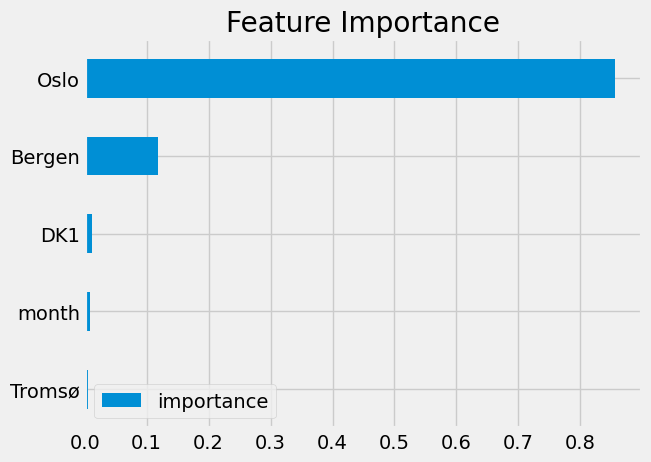

In [6]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

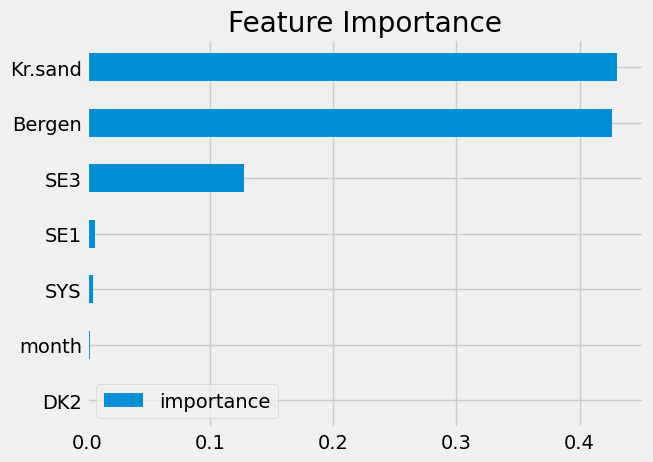

In [13]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

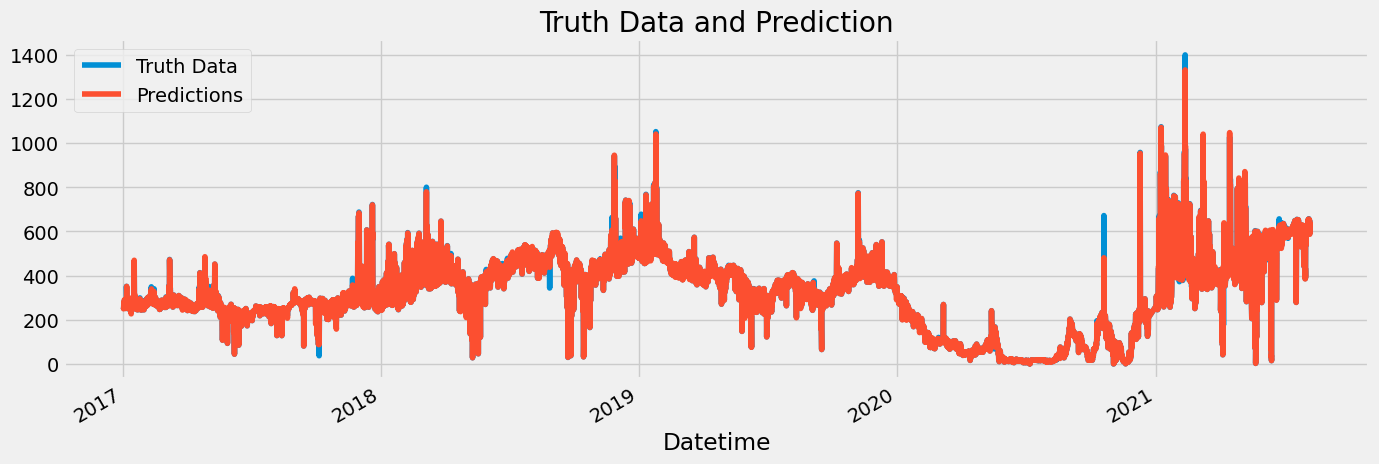

In [29]:
test['prediction'] = reg.predict(X_test)
ax = test[['Kr.sand']].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Truth Data and Prediction')
plt.show()

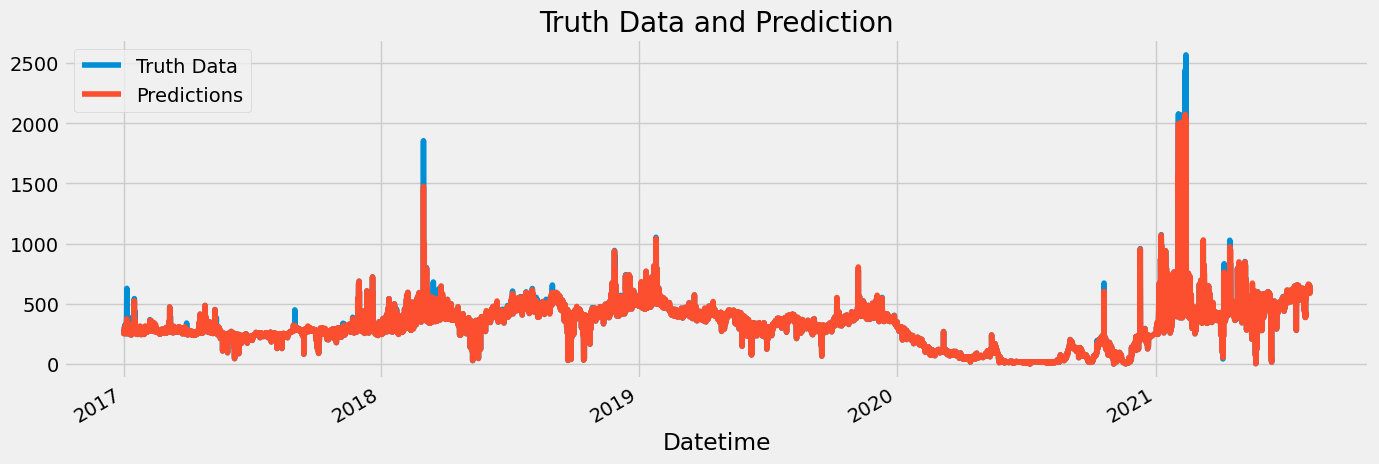

In [14]:
test['prediction'] = reg.predict(X_test)
ax = test[['Oslo']].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Truth Data and Prediction')
plt.show()

In [30]:
#Kr.sand
score = reg.score(X_train,y_train) 
print("Training score: ", score)

score = reg.score(X_test,y_test)
print("test score: ", score)

rmse1 = np.sqrt(mean_squared_error(y_test, test['prediction']))
print(f'RMSE Score on Test set: {rmse1:0.2f}')


mse = mean_squared_error(y_test, test['prediction'])

print("MSE : % f" %(mse))


Training score:  0.9999946918306725
test score:  0.9979391036756251
RMSE Score on Test set: 7.40
MSE :  54.784413


In [15]:
#Oslo
score = reg.score(X_train,y_train) 
print("Training score: ", score)

score = reg.score(X_test,y_test)
print("test score: ", score)

rmse1 = np.sqrt(mean_squared_error(y_test, test['prediction']))
print(f'RMSE Score on Test set: {rmse1:0.2f}')


mse = mean_squared_error(y_test, test['prediction'])

print("MSE : % f" %(mse))


Training score:  0.9999986558909577
test score:  0.9953823405091732
RMSE Score on Test set: 11.48
MSE :  131.825531


In [31]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2021-04-06    71.173193
2021-06-14    51.259312
2018-03-28    49.958292
2021-06-26    42.158044
2021-06-15    38.322486
2021-06-20    36.727661
2018-03-16    33.232669
2021-06-28    30.615146
2021-06-16    28.037740
2021-02-06    27.855091
Name: error, dtype: float64